In [151]:
#Relevant modules
import pandas as pd
import statsmodels.api as sm
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import numpy as np

It is common knowledge that obeying the traffic signs while driving reduces the number of accidents on the
road. Is the previous really true? If it is, the more signs the safer the highway? In this problem we will
analyze data from 39 sections of large highways in Minnesota in 1973 to try to give answers to these questions.
The data file includes the following columns:
Rate: 1973 accident rate per million vehicle miles.
Signs: signals per mile of roadway, adjusted to have no zero values.
The data is in the file “Highway.csv”.

### Exploratory Data Analysis

In [58]:
data = pd.read_csv('Highway.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.rename(columns={'sigs1':'signs'}, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
rate     39 non-null float64
len      39 non-null float64
ADT      39 non-null int64
trks     39 non-null int64
signs    39 non-null float64
slim     39 non-null int64
shld     39 non-null int64
lane     39 non-null int64
acpt     39 non-null float64
itg      39 non-null float64
lwid     39 non-null int64
hwy      39 non-null object
dtypes: float64(5), int64(6), object(1)
memory usage: 3.7+ KB


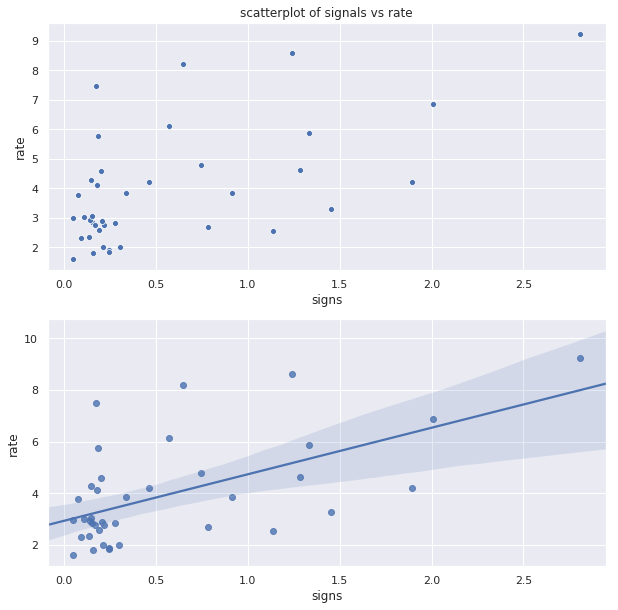

In [62]:
#Using a scatter plot  to describe the relationship between the rate of accidents and the number of signs
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.scatterplot(x='signs', y='rate', data=data)
plt.title('scatterplot of signals vs rate')
plt.subplot(2,1,2)
sns.regplot(x='signs', y='rate', data=data);

From the scatter plot we can see that there is a positive relationship between the two variables that may be
linear.

In [63]:
#What is the value of the correlation coefficient?
np.corrcoef(data.rate, data.signs)[0, 1]

0.5829072187298152

The correlation coefficient between the two variables is 0.5829072, which supports our previous hypothesis
that the variables are positively correlated.

Based of this exploratory analysis, it is reasonable to assume a simple linear regression model between the rate of accidents and the number of signs.

There is no need to pursue a transformation of the data above.

### Fitting the Simple Linear Regression Model

Fit a linear regression to evaluate the relationship between the rate of accidents and the number of signs. Do
not transform the data

In [74]:
#Using statsmodels:
X = data[['signs']]
y = data['rate']

X = sm.add_constant(X)
#Note the swap of X and y
model = sm.OLS(y, X).fit()
#Statsmodels gives R-like statistical output
print(model.summary())
print()
print('Parameters: ', model.params)
print('R2: ', model.rsquared)
print('estimate for the error term: ', model.scale)

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     19.04
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           9.86e-05
Time:                        13:55:51   Log-Likelihood:                -73.496
No. Observations:                  39   AIC:                             151.0
Df Residuals:                      37   BIC:                             154.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9310      0.348      8.414      0.0

/home/dror/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The estimate for the intercept is: β̂ 0 = 2.9310 and the estimate for the slope is: β̂ 1 = 1.8021 and the
estimate for the error term is σ̂ 2 = 2.675

The regression equation:  rate = 2.9310 + 1.8021 × signs


The estimate for β̂ 1 means that an increase in one signal per mile of roadway increases the accident rate by
1.8021 units with a standard error of 0.4130

In [76]:
#Finding a 95% confidence interval for the slope parameter
model.conf_int(alpha=0.05, cols=None)

,0,1
const,2.225204,3.636798
signs,0.965315,2.638810


The result from the 95% CI is (0.965315, 2.638810). Since 0 is not included in the CI we can conclude that
the explanatory variable signs is statistically significant at the significance level α = 0.05

### Checking the Assumptions of the Model


To check whether the assumptions are met, we use three visual displays:
1. Scatterplot of the data
2. Residual plot - a plot of the residuals, epsilon_i , versus, ŷ_i (also called the predicted or fitted values)
3. Normal probability plot of the residuals, or q-q

####  1. Linearity Assumption

We already plotted the scatterplot between rate and signs. 
From the scatter plot, we can see that it is reasonable to assume that there is a linear relationship between
signs and rate, and that there are no obvious outliers.

#### 2. Constant variance assumption - Residual plot
The residual plot is used to assess the constant variance assumption and used to check for uncorrelated errors
as a proxy for the independence assumption.

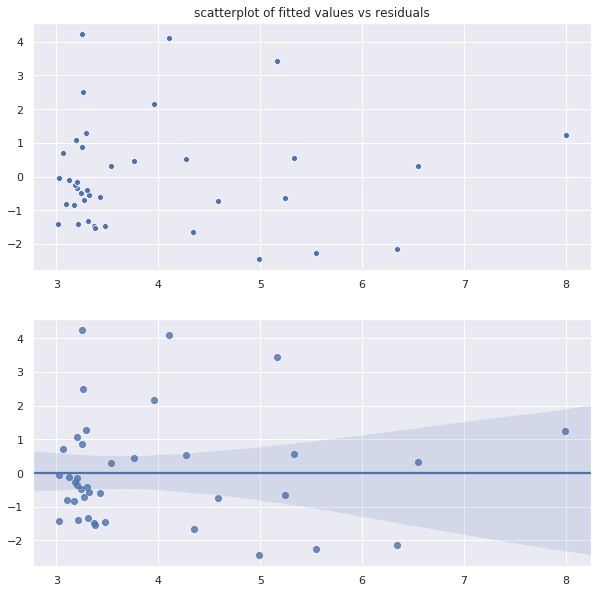

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.scatterplot(model.fittedvalues, model.resid, data=data)
plt.title('scatterplot of fitted values vs residuals')
plt.subplot(2,1,2)
sns.regplot(model.fittedvalues, model.resid);


From the residual plot, we can see that there is a cluster of points just underneath the zero line on the left,
and as we move to the right the residuals seem to be further away from 0, suggesting that there is some
heteroscedasticity (non-constant variance) in the residuals.
Although we cannot directly check the independence assumption, we can check for correlation between
the residuals as a proxy. Using correlation as a proxy, we would expect to see no obvious pattern in the
distribution of the residuals. However, there appears to be a cluster of points in the lower left corner, which
suggests that the residuals may be correlated and independence assumption may not hold.

#### 3. The qq-plot is used to assess the normality assumption.

<Figure size 720x720 with 0 Axes>

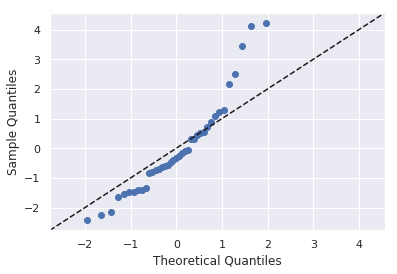

In [126]:
plt.figure(figsize=(10,10))
qq = sm.qqplot(model.resid)
sm.qqline(qq.axes[0], line='45', fmt='k--');

Finally, we can see that the qq-plot has an S-shape, especially on the upper tail. This may suggest that the
error term is not normally distributed.

### Prediction

Suppose we are interested in what the rate of accidents is when signs = 1.25.

In [150]:
prediction = model.get_prediction([1, 1.25])
prediction.summary_frame() # will throw error. but this line is needed for "table" to emerge                                                                           
prediction.table # final desired results are here. 


OrderedDict([('mean', array([5.18357908])),
             ('mean_se', array([0.3881565])),
             ('mean_ci_lower', array([4.39709931])),
             ('mean_ci_upper', array([5.97005885])),
             ('obs_ci_lower', array([1.77788966])),
             ('obs_ci_upper', array([8.5892685]))])

The point prediction is 5.183579 and the 95% prediction interval is (1.77789, 8.589268).

### Extra - prediction with scikit learn

In [146]:
#Let's get the intercept and coefficients, using the same regression model with sklearn
X = data[['signs']]
y = data['rate']
#Fit the linear model
model_sklearn = lm.LinearRegression()
results = model_sklearn.fit(X,y)
#print the coefficients
print('intercept: ',model_sklearn.intercept_)
print('coefficients: ', model_sklearn.coef_)
#predict when signs = 1.25
model_sklearn.predict(np.array(1.25).reshape(1,1))

intercept:  2.931001155836374
coefficients:  [1.80206234]


array([5.18357908])